Age and Coffee Consumption:

Analyze the correlation between age and the number of cups of coffee consumed per day.
Determine if there are significant differences in coffee drinking habits among different age groups.
Gender and Coffee Preferences:

Compare coffee consumption patterns between different genders.
Investigate if certain types of coffee drinks or brewing methods are more popular among specific genders.
Education Level and Coffee Knowledge:

Explore the relationship between education level and self-rated coffee expertise.
Determine if education level influences preferences for certain coffee roasts or brewing methods.
Employment Status and Coffee Consumption:

Analyze how employment status (working from home vs. in-person) affects coffee consumption habits and preferences.

In [1]:
import pandas as pd

In [2]:
coffee_path = r'C:\Users\44771\Documents\Repo\Data_projects_24\coffee_survey\coffee_data.csv'
coffee_df = pd.read_csv(coffee_path)
all_col = coffee_df.columns.to_list()

## Find the relationship between age group and number of coffees typically drunk per day on average.

In [3]:
coffee_df['What is your age?'].unique()
# Find all unique values for this column and datatype.

array(['18-24 years old', '25-34 years old', '35-44 years old',
       '55-64 years old', nan, '<18 years old', '>65 years old',
       '45-54 years old'], dtype=object)

In [6]:
age_category_order = [
    '<18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '>65 years old'
]

# Specify an ordering of the age category from youngest to oldest and convert into categorical data type.

coffee_df['What is your age?'] = pd.Categorical(coffee_df['What is your age?'], categories=age_category_order, ordered=True)

In [7]:
# Repeat same process for number of cups of coffee drank per day.
coffee_df['How many cups of coffee do you typically drink per day?'].unique()

[NaN, 'Less than 1', '2', '1', '3', 'More than 4', '4']
Categories (6, object): ['Less than 1' < '1' < '2' < '3' < '4' < 'More than 4']

In [8]:
coffee_df['How many cups of coffee do you typically drink per day?'].unique()
no_coffees_order = [
    'Less than 1',
    '1',
    '2',
    '3',
    '4',
    'More than 4'
]

coffee_df['How many cups of coffee do you typically drink per day?'] = pd.Categorical(coffee_df['How many cups of coffee do you typically drink per day?'], categories=no_coffees_order, ordered=True)

In [12]:
# Produce new dataframe with just these 2 columns.

age_no_coffee = coffee_df[[
    'What is your age?',
    'How many cups of coffee do you typically drink per day?'
]].sort_values(['What is your age?','How many cups of coffee do you typically drink per day?'])

age_no_coffee

,What is your age?,How many cups of coffee do you typically drink per day?
2544,<18 years old,Less than 1
2552,<18 years old,Less than 1
2612,<18 years old,Less than 1
3053,<18 years old,Less than 1
3438,<18 years old,Less than 1
...,...,...
3878,NaN,NaN
3883,NaN,NaN
3959,NaN,NaN
3997,NaN,NaN


In [20]:
# Find the % of people each age category that drink a specific number of cups per day.
age_no_coffee_pct = round(age_no_coffee.groupby('What is your age?').value_counts(normalize=True)*100,1)
age_no_coffee_pct

C:\Users\44771\AppData\Local\Temp\ipykernel_25704\4207163180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_no_coffee_pct = round(age_no_coffee.groupby('What is your age?').value_counts(normalize=True)*100,1)


What is your age?  How many cups of coffee do you typically drink per day?
<18 years old      2                                                          36.8
                   1                                                          31.6
                   Less than 1                                                26.3
                   3                                                           5.3
                   4                                                           0.0
                   More than 4                                                 0.0
18-24 years old    1                                                          37.1
                   2                                                          35.8
                   Less than 1                                                15.7
                   3                                                           7.4
                   4                                                           2.2
            

In [21]:
age_no_coffee_pct = pd.Series(age_no_coffee_pct)

In [25]:
df_age_no_coffee_pct = age_no_coffee_pct.unstack().fillna(0)

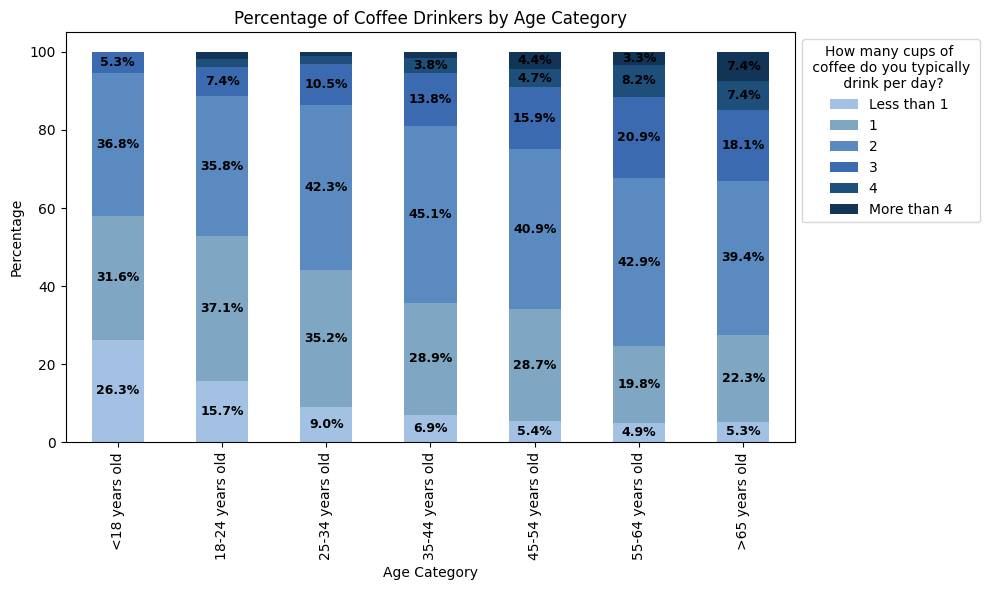

In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bars
df_age_no_coffee_pct.plot(kind='bar', stacked=True, ax=ax, color=['#a3c2e3', '#7fa6c2', '#5a8abf', '#3b6ab0', '#1e4e7a', '#123456'])
# Adding labels and title
ax.set_xlabel('Age Category')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Coffee Drinkers by Age Category')
legend = ax.legend(title='How many cups of \n coffee do you typically \n drink per day?', bbox_to_anchor=(1, 1), loc='upper left')
legend.get_title().set_ha('center')

for i, (age, row) in enumerate(df_age_no_coffee_pct.iterrows()):
    bottom = 0
    for col in df_age_no_coffee_pct.columns:
        height = row[col]
        if height > 3:
            ax.text(i, bottom + height / 2, f'{height}%', 
                    ha='center', va='center', fontsize=9, color='black', 
                    weight='bold')
            bottom += height

# Display the plot
plt.tight_layout()
plt.show()